全遺伝子のうちTSS上流2kbにklf4のモチーフを持つ遺伝子を抽出した。<br>
それら遺伝子(klf4の下流遺伝子)のMⅡでの遺伝子発現を調べるとともに、スクリーニングした遺伝子とのベン図を書いた

In [1]:
#! usr/bin/env python

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# 目盛り調整のticker追加
import matplotlib.ticker as ticker

In [3]:
#データの読み込み
df = pd.read_csv('./motifGenes/all_klf4_TFmotif.bed', sep='\t',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,chr1,3071252,3073252,+,ENSMUST00000193812,ENSMUSG00000102693,4933401J01Rik,.,-1,-1,.,.,.,.
1,chr1,3100015,3102015,+,ENSMUST00000082908,ENSMUSG00000064842,Gm26206,.,-1,-1,.,.,.,.
2,chr1,3216344,3218344,-,ENSMUST00000162897,ENSMUSG00000051951,Xkr4,.,-1,-1,.,.,.,.
3,chr1,3215632,3217632,-,ENSMUST00000159265,ENSMUSG00000051951,Xkr4,.,-1,-1,.,.,.,.
4,chr1,3671498,3673498,-,ENSMUST00000070533,ENSMUSG00000051951,Xkr4,.,-1,-1,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110312,chrY,90783441,90785441,+,ENSMUST00000177591,ENSMUSG00000096768,Erdr1,.,-1,-1,.,.,.,.
110313,chrY,90783500,90785500,+,ENSMUST00000177671,ENSMUSG00000096768,Erdr1,.,-1,-1,.,.,.,.
110314,chrY,90783585,90785585,+,ENSMUST00000179077,ENSMUSG00000096768,Erdr1,.,-1,-1,.,.,.,.
110315,chrY,90835412,90837412,+,ENSMUST00000189352,ENSMUSG00000099871,Gm21742,.,-1,-1,.,.,.,.


In [4]:
df = df.rename(columns={6: 'gene_id'})

In [5]:
df = df[df[10] == 'Klf4' ]
df = df[~df['gene_id'].duplicated()]
df

,0,1,2,3,4,5,gene_id,7,8,9,10,11,12,13
2534,chr1,66698830,66700830,+,ENSMUST00000151016,ENSMUSG00000026005,Rpe,chr1,66700336,66700345,Klf4,12.949,+,MA0039.2
5420,chr1,135585355,135587355,-,ENSMUST00000040599,ENSMUSG00000009418,Nav1,chr1,135585570,135585579,Klf4,16.1837,+,MA0039.2
6043,chr1,153851195,153853195,-,ENSMUST00000059607,ENSMUSG00000045968,Teddm2,chr1,153851290,153851299,Klf4,14.398,+,MA0039.2
6061,chr1,153898605,153900605,+,ENSMUST00000139476,ENSMUSG00000026473,Glul,chr1,153900247,153900256,Klf4,14.5306,+,MA0039.2
6666,chr1,164247045,164249045,+,ENSMUST00000044021,ENSMUSG00000040918,Slc19a2,chr1,164248927,164248936,Klf4,16.3163,+,MA0039.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101750,chr9,107574926,107576926,+,ENSMUST00000112387,ENSMUSG00000010051,Hyal1,chr9,107576907,107576916,Klf4,14.6633,+,MA0039.2
101754,chr9,107576886,107578886,+,ENSMUST00000139274,ENSMUSG00000079334,Nat6,chr9,107576907,107576916,Klf4,14.6633,+,MA0039.2
101770,chr9,107578817,107580817,+,ENSMUST00000148440,ENSMUSG00000036091,Hyal3,chr9,107578918,107578927,Klf4,12.9694,+,MA0039.2
102708,chr9,114933987,114935987,-,ENSMUST00000146623,ENSMUSG00000050627,Gpd1l,chr9,114934034,114934043,Klf4,16.051,-,MA0039.2


***遺伝子発現***

In [6]:
#発現量データの読み込み
ex1 = pd.read_csv('./seqData/M2_expression_mm10.tsv',sep='\t')
ex1

,gene_id,BDF1_TPM_avr,ICR_TPM_avr,ddY_TPM_avr,BDF1_FPKM_avr,ICR_FPKM_avr,ddY_FPKM_avr
0,0610005C13Rik,0.000,0.070,0.120,0.000,0.025,0.045
1,0610007P14Rik,75.125,71.010,70.935,28.885,28.195,27.560
2,0610009B22Rik,51.995,52.820,45.160,20.025,21.005,17.545
3,0610009L18Rik,2.180,6.045,2.560,0.835,2.405,0.995
4,0610009O20Rik,8.540,6.290,6.905,3.280,2.500,2.680
...,...,...,...,...,...,...,...
24406,Zyx,9.880,5.195,6.115,3.800,2.060,2.375
24407,Zzef1,5.310,4.405,5.240,2.045,1.745,2.035
24408,Zzz3,48.870,39.780,41.065,18.760,15.795,15.940
24409,a,0.000,0.000,0.000,0.000,0.000,0.000


In [7]:
# merge data
k4 = pd.merge(df,ex1 ,on = 'gene_id',how = 'left')

klf4 = k4[['BDF1_FPKM_avr','ICR_FPKM_avr','ddY_FPKM_avr']]
klf4 = klf4.dropna(how='any')
klf4

,BDF1_FPKM_avr,ICR_FPKM_avr,ddY_FPKM_avr
0,13.675,4.600,3.965
1,4.240,1.970,1.720
2,1.210,0.645,0.315
3,2.800,3.955,3.980
4,2.010,0.250,0.140
...,...,...,...
91,0.000,0.000,0.000
92,5.970,3.230,2.935
93,0.135,0.195,0.065
94,32.985,13.190,9.250


In [8]:
sns.set()
sns.set_style('whitegrid')
#sns.set_palette("Set3")

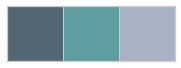

In [9]:
flatui = ["#536872", "#5F9EA0", "#A9B2C3"]

sns.palplot(sns.color_palette(flatui))
sns.set_palette(flatui)

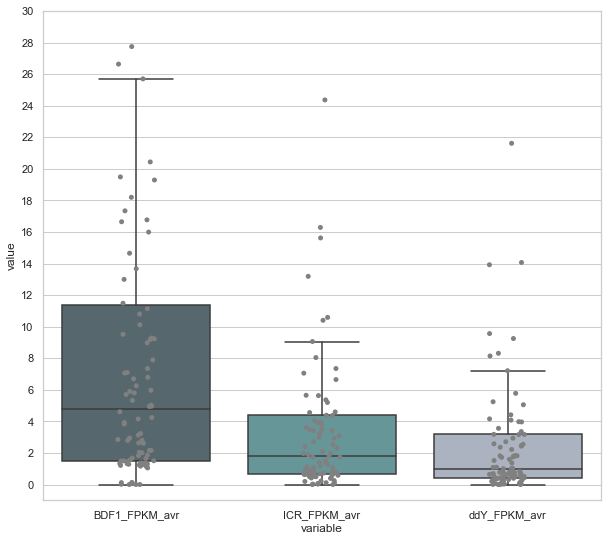

In [10]:
fig, axs = plt.subplots(figsize=(10, 9), sharex=True, sharey=True)

ax = plt.gca() # axesを取得
ax.set_ylim(-1,30)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))# y軸(yaxis)に対して、1ごと目盛りを入れる

sns.boxplot(x='variable', y='value', data=pd.melt(klf4), showfliers=False)
sns.stripplot(x='variable', y='value', data=pd.melt(klf4), jitter=True, color='gray', ax=ax)

plt.savefig("./outfig/klf4ds-strain.png", dpi=600)

***t-検定***

In [11]:
from scipy import stats

対応のない t検定	stats.ttest_ind<br>
対応のある t検定	stats.ttest_rel<br>
片側検定の場合は "less" か "greater" を指定する． 対立仮説を「引数aの平均値<引数bの平均値」とするなら "less" , 「引数aの平均値>引数bの平均値」とするなら "greater" <br>
スチューデントはequal_var = True、ウェルチは equal_var = False

In [12]:
#BDF1 vs ICR
stats.ttest_ind(klf4['BDF1_FPKM_avr'], klf4['ICR_FPKM_avr'], alternative='greater', equal_var = False)

Ttest_indResult(statistic=1.811898959029661, pvalue=0.03589983559576862)

In [13]:
#BDF1 vs ddY
stats.ttest_ind(klf4['BDF1_FPKM_avr'], klf4['ddY_FPKM_avr'], alternative='greater', equal_var = False)

Ttest_indResult(statistic=2.213334908985862, pvalue=0.014138562630511387)

In [14]:
#ICR vs ddY
stats.ttest_ind(klf4['ICR_FPKM_avr'], klf4['ddY_FPKM_avr'], alternative='greater', equal_var = False)

Ttest_indResult(statistic=0.45545172574367593, pvalue=0.3246587027893377)

***ベン図***

In [15]:
#Nanの部分
nan = k4[k4.isnull().any(axis=1)]
nan

,0,1,2,3,4,5,gene_id,7,8,9,10,11,12,13,BDF1_TPM_avr,ICR_TPM_avr,ddY_TPM_avr,BDF1_FPKM_avr,ICR_FPKM_avr,ddY_FPKM_avr
13,chr11,44467012,44469012,+,ENSMUST00000175148,ENSMUSG00000092889,Gm22121,chr11,44467715,44467724,Klf4,14.2857,+,MA0039.2,NaN,NaN,NaN,NaN,NaN,NaN
60,chr5,98029566,98031566,+,ENSMUST00000195915,ENSMUSG00000106518,RP23-178N8.3,chr5,98031231,98031240,Klf4,16.4286,+,MA0039.2,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#klf4のモチーフがある遺伝子
#k4 = k4.dropna(how='any')
k4

,0,1,2,3,4,5,gene_id,7,8,9,10,11,12,13,BDF1_TPM_avr,ICR_TPM_avr,ddY_TPM_avr,BDF1_FPKM_avr,ICR_FPKM_avr,ddY_FPKM_avr
0,chr1,66698830,66700830,+,ENSMUST00000151016,ENSMUSG00000026005,Rpe,chr1,66700336,66700345,Klf4,12.949,+,MA0039.2,35.565,11.580,10.200,13.675,4.600,3.965
1,chr1,135585355,135587355,-,ENSMUST00000040599,ENSMUSG00000009418,Nav1,chr1,135585570,135585579,Klf4,16.1837,+,MA0039.2,11.050,4.960,4.440,4.240,1.970,1.720
2,chr1,153851195,153853195,-,ENSMUST00000059607,ENSMUSG00000045968,Teddm2,chr1,153851290,153851299,Klf4,14.398,+,MA0039.2,3.140,1.620,0.815,1.210,0.645,0.315
3,chr1,153898605,153900605,+,ENSMUST00000139476,ENSMUSG00000026473,Glul,chr1,153900247,153900256,Klf4,14.5306,+,MA0039.2,7.260,9.970,10.250,2.800,3.955,3.980
4,chr1,164247045,164249045,+,ENSMUST00000044021,ENSMUSG00000040918,Slc19a2,chr1,164248927,164248936,Klf4,16.3163,+,MA0039.2,5.235,0.625,0.365,2.010,0.250,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,chr9,107574926,107576926,+,ENSMUST00000112387,ENSMUSG00000010051,Hyal1,chr9,107576907,107576916,Klf4,14.6633,+,MA0039.2,0.000,0.000,0.000,0.000,0.000,0.000
92,chr9,107576886,107578886,+,ENSMUST00000139274,ENSMUSG00000079334,Nat6,chr9,107576907,107576916,Klf4,14.6633,+,MA0039.2,15.505,8.120,7.565,5.970,3.230,2.935
93,chr9,107578817,107580817,+,ENSMUST00000148440,ENSMUSG00000036091,Hyal3,chr9,107578918,107578927,Klf4,12.9694,+,MA0039.2,0.355,0.500,0.170,0.135,0.195,0.065
94,chr9,114933987,114935987,-,ENSMUST00000146623,ENSMUSG00000050627,Gpd1l,chr9,114934034,114934043,Klf4,16.051,-,MA0039.2,86.010,33.155,23.800,32.985,13.190,9.250


In [17]:
#スクリーニングした遺伝子の抽出
sc = pd.read_csv('./genes/BDF1_expressed.tsv',sep='\t')
sc

,gene_id,BDF1_FPKM_avr,ICR_FPKM_avr,ddY_FPKM_avr
0,1190007I07Rik,5.335,1.070,0.705
1,1700097N02Rik,3.230,0.625,0.340
2,2810002D19Rik,2.220,1.270,1.030
3,AF067063,1.320,0.415,0.245
4,Abhd14a,1.345,0.680,0.510
...,...,...,...,...
85,Ublcp1,16.770,3.525,3.170
86,Vps37a,10.120,5.655,5.055
87,Zfp534,2.945,0.850,0.630
88,Zfp608,5.900,2.935,0.910


In [18]:
mg1 = pd.merge(k4,sc ,on = 'gene_id',how = 'left')
ins = mg1.dropna(how='any')
ins #共通部分

,0,1,2,3,4,5,gene_id,7,8,9,...,13,BDF1_TPM_avr,ICR_TPM_avr,ddY_TPM_avr,BDF1_FPKM_avr_x,ICR_FPKM_avr_x,ddY_FPKM_avr_x,BDF1_FPKM_avr_y,ICR_FPKM_avr_y,ddY_FPKM_avr_y
0,chr1,66698830,66700830,+,ENSMUST00000151016,ENSMUSG00000026005,Rpe,chr1,66700336,66700345,...,MA0039.2,35.565,11.580,10.200,13.675,4.600,3.965,13.675,4.600,3.965
1,chr1,135585355,135587355,-,ENSMUST00000040599,ENSMUSG00000009418,Nav1,chr1,135585570,135585579,...,MA0039.2,11.050,4.960,4.440,4.240,1.970,1.720,4.240,1.970,1.720
2,chr1,153851195,153853195,-,ENSMUST00000059607,ENSMUSG00000045968,Teddm2,chr1,153851290,153851299,...,MA0039.2,3.140,1.620,0.815,1.210,0.645,0.315,1.210,0.645,0.315
4,chr1,164247045,164249045,+,ENSMUST00000044021,ENSMUSG00000040918,Slc19a2,chr1,164248927,164248936,...,MA0039.2,5.235,0.625,0.365,2.010,0.250,0.140,2.010,0.250,0.140
5,chr10,20345818,20347818,+,ENSMUST00000169712,ENSMUSG00000019992,Mtfr2,chr10,20346998,20347007,...,MA0039.2,372.090,166.895,145.700,143.065,66.315,56.570,143.065,66.315,56.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,chr9,106427453,106429453,+,ENSMUST00000150576,ENSMUSG00000048758,Rpl29,chr9,106429381,106429390,...,MA0039.2,213.580,41.015,36.215,82.415,16.290,14.070,82.415,16.290,14.070
89,chr9,106447678,106449678,-,ENSMUST00000048685,ENSMUSG00000042210,Abhd14a,chr9,106448630,106448639,...,MA0039.2,3.505,1.720,1.310,1.345,0.680,0.510,1.345,0.680,0.510
92,chr9,107576886,107578886,+,ENSMUST00000139274,ENSMUSG00000079334,Nat6,chr9,107576907,107576916,...,MA0039.2,15.505,8.120,7.565,5.970,3.230,2.935,5.970,3.230,2.935
94,chr9,114933987,114935987,-,ENSMUST00000146623,ENSMUSG00000050627,Gpd1l,chr9,114934034,114934043,...,MA0039.2,86.010,33.155,23.800,32.985,13.190,9.250,32.985,13.190,9.250


In [19]:
ins.to_csv('./genes/intersect.csv', sep=',',index=None ,header=True)

In [20]:
k_sp = mg1[mg1.isnull().any(axis=1)]
k_sp #klf4_specific

,0,1,2,3,4,5,gene_id,7,8,9,...,13,BDF1_TPM_avr,ICR_TPM_avr,ddY_TPM_avr,BDF1_FPKM_avr_x,ICR_FPKM_avr_x,ddY_FPKM_avr_x,BDF1_FPKM_avr_y,ICR_FPKM_avr_y,ddY_FPKM_avr_y
3,chr1,153898605,153900605,+,ENSMUST00000139476,ENSMUSG00000026473,Glul,chr1,153900247,153900256,...,MA0039.2,7.260,9.970,10.250,2.800,3.955,3.980,NaN,NaN,NaN
8,chr10,120201659,120203659,-,ENSMUST00000020448,ENSMUSG00000020227,Irak3,chr10,120201759,120201768,...,MA0039.2,0.040,0.055,0.100,0.015,0.025,0.035,NaN,NaN,NaN
13,chr11,44467012,44469012,+,ENSMUST00000175148,ENSMUSG00000092889,Gm22121,chr11,44467715,44467724,...,MA0039.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,chr17,24884642,24886642,+,ENSMUST00000117890,ENSMUSG00000024160,Spsb3,chr17,24886628,24886637,...,MA0039.2,5.605,4.765,4.125,2.160,1.890,1.595,NaN,NaN,NaN
37,chr2,58565297,58567297,+,ENSMUST00000135737,ENSMUSG00000026839,Upp2,chr2,58566874,58566883,...,MA0039.2,0.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,NaN
49,chr4,129620592,129622592,-,ENSMUST00000126777,ENSMUSG00000028795,Ccdc28b,chr4,129621086,129621095,...,MA0039.2,43.255,61.300,55.670,16.650,24.370,21.620,NaN,NaN,NaN
56,chr5,91962556,91964556,-,ENSMUST00000140670,ENSMUSG00000029397,Rchy1,chr5,91963127,91963136,...,MA0039.2,200.045,151.785,125.600,76.845,60.230,48.755,NaN,NaN,NaN
60,chr5,98029566,98031566,+,ENSMUST00000195915,ENSMUSG00000106518,RP23-178N8.3,chr5,98031231,98031240,...,MA0039.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,chr6,145209133,145211133,+,ENSMUST00000111725,ENSMUSG00000040370,Lyrm5,chr6,145210885,145210894,...,MA0039.2,0.315,0.180,0.095,0.120,0.070,0.035,NaN,NaN,NaN
67,chr7,19358645,19360645,+,ENSMUST00000127785,ENSMUSG00000040734,Ppp1r13l,chr7,19360222,19360231,...,MA0039.2,13.060,9.855,10.520,5.030,3.915,4.080,NaN,NaN,NaN


In [21]:
mg2 = pd.merge(k4,sc ,on = 'gene_id',how = 'right')
sc_sp = mg2[mg2.isnull().any(axis=1)]
sc_sp #screening_specific

,0,1,2,3,4,5,gene_id,7,8,9,...,13,BDF1_TPM_avr,ICR_TPM_avr,ddY_TPM_avr,BDF1_FPKM_avr_x,ICR_FPKM_avr_x,ddY_FPKM_avr_x,BDF1_FPKM_avr_y,ICR_FPKM_avr_y,ddY_FPKM_avr_y
2,NaN,NaN,NaN,NaN,NaN,NaN,2810002D19Rik,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.220,1.270,1.030
13,NaN,NaN,NaN,NaN,NaN,NaN,BC052688,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.765,2.250,0.060
19,NaN,NaN,NaN,NaN,NaN,NaN,Cdh19,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.450,0.535,0.470
22,NaN,NaN,NaN,NaN,NaN,NaN,Colgalt2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.425,0.505,0.340
33,NaN,NaN,NaN,NaN,NaN,NaN,Gm10324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.255,10.270,6.150
37,NaN,NaN,NaN,NaN,NaN,NaN,Gm7104,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.700,4.700,0.110
46,NaN,NaN,NaN,NaN,NaN,NaN,Kcnk18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.845,7.855,4.145
59,NaN,NaN,NaN,NaN,NaN,NaN,Pop4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.025,23.720,16.245
78,NaN,NaN,NaN,NaN,NaN,NaN,Tmem222,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.045,3.940,2.975


In [22]:
len(sc_sp)

9

In [23]:
from matplotlib_venn import venn2

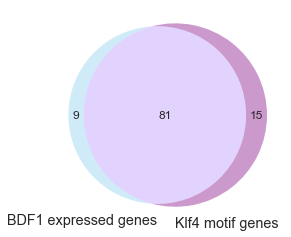

In [24]:
venn2(subsets=(len(sc_sp), len(k_sp), len(ins)),set_labels=('BDF1 expressed genes', 'Klf4 motif genes'),set_colors=('skyblue', 'purple'))
plt.savefig("./outfig/venn-klf4.png", dpi=600)

In [25]:
k4

,0,1,2,3,4,5,gene_id,7,8,9,10,11,12,13,BDF1_TPM_avr,ICR_TPM_avr,ddY_TPM_avr,BDF1_FPKM_avr,ICR_FPKM_avr,ddY_FPKM_avr
0,chr1,66698830,66700830,+,ENSMUST00000151016,ENSMUSG00000026005,Rpe,chr1,66700336,66700345,Klf4,12.949,+,MA0039.2,35.565,11.580,10.200,13.675,4.600,3.965
1,chr1,135585355,135587355,-,ENSMUST00000040599,ENSMUSG00000009418,Nav1,chr1,135585570,135585579,Klf4,16.1837,+,MA0039.2,11.050,4.960,4.440,4.240,1.970,1.720
2,chr1,153851195,153853195,-,ENSMUST00000059607,ENSMUSG00000045968,Teddm2,chr1,153851290,153851299,Klf4,14.398,+,MA0039.2,3.140,1.620,0.815,1.210,0.645,0.315
3,chr1,153898605,153900605,+,ENSMUST00000139476,ENSMUSG00000026473,Glul,chr1,153900247,153900256,Klf4,14.5306,+,MA0039.2,7.260,9.970,10.250,2.800,3.955,3.980
4,chr1,164247045,164249045,+,ENSMUST00000044021,ENSMUSG00000040918,Slc19a2,chr1,164248927,164248936,Klf4,16.3163,+,MA0039.2,5.235,0.625,0.365,2.010,0.250,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,chr9,107574926,107576926,+,ENSMUST00000112387,ENSMUSG00000010051,Hyal1,chr9,107576907,107576916,Klf4,14.6633,+,MA0039.2,0.000,0.000,0.000,0.000,0.000,0.000
92,chr9,107576886,107578886,+,ENSMUST00000139274,ENSMUSG00000079334,Nat6,chr9,107576907,107576916,Klf4,14.6633,+,MA0039.2,15.505,8.120,7.565,5.970,3.230,2.935
93,chr9,107578817,107580817,+,ENSMUST00000148440,ENSMUSG00000036091,Hyal3,chr9,107578918,107578927,Klf4,12.9694,+,MA0039.2,0.355,0.500,0.170,0.135,0.195,0.065
94,chr9,114933987,114935987,-,ENSMUST00000146623,ENSMUSG00000050627,Gpd1l,chr9,114934034,114934043,Klf4,16.051,-,MA0039.2,86.010,33.155,23.800,32.985,13.190,9.250


In [26]:
k4.to_csv('./genes/klf4_downstream.csv', sep=',',index=None ,header=True)